In [27]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [25]:
#Path to the folder with de novo protein designs that bind to 564 site of CD45 receptor
grafting_output = '/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results'


In [28]:
#Recursively walks through the directory tree with grafting output design and collects the file paths of two types of files, ".sc" and ".pdb", into separate lists
#Pdb files contain the resulting protein structures
#Sc files contain energy scores of the resulting protein structures, which evaluate their der Waals forces, electrostatic interactions, hydrogen bonding, etc.
all_mg_scores = []
all_mg_pdbs = []
for root, dirs, files in os.walk(grafting_output):
    for f in files:
        if f.endswith('.sc'):
            all_mg_scores.append(os.path.join(root, f))
        elif f.endswith('.pdb'):
            all_mg_pdbs.append(os.path.join(root, f))


In [ ]:
print(all_mg_scores[:5])

['/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_25/69/score_S25.sc', '/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_25/37/score_S25.sc', '/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_25/119/score_S25.sc', '/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_25/103/score_S25.sc', '/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_25/246/score_S25.sc']


In [7]:
len(all_mg_pdbs)

6811

In [13]:
#Walks through all .sc files from the previous step, interprets their contents according to the Rosetta output file format and appends the scores to the list aff_dfs
#It adds a new column to the list with a scorefile_path
#In case an error happened during Rosetta execution, then an additional option 'description' is applied
all_dfs = []
for file_path in all_mg_scores:
    try:
        parsed_scores = rsb.io.parse_rosetta_file(file_path)
        parsed_scores['scorefile_path'] = file_path
        all_dfs.append(parsed_scores)
    except IndexError:
            try:
                parsed_score = rsb.io.parse_rosetta_file(file_path, description={'graft_ranges': 2})
                parsed_score['scorefile_path'] = file_path
                all_dfs.append(parsed_scores)
            except IndexError:
                try:
                    parsed_score = rsb.io.parse_rosetta_file(file_path, description={'graft_ranges': 3})
                    parsed_score['scorefile_path'] = file_path
                    all_dfs.append(parsed_scores)
                except IndexError:
                    pass

In [29]:
#All the scores are being concatenated in a single DataFrame.
all_mg_scores_df = pd.concat(all_dfs)
all_mg_scores_df

,total_score,buried_unsat_hbonds,coordinate_constraint,ddG,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,...,sasa,sc,yhh_planarity,graft_full_bb_mode,graft_in_motif_ranges,graft_in_scaffold_ranges,graft_out_scaffold_ranges,graft_scaffold_size_change,description,scorefile_path
0,-1190.090,3.0,12.161,-36.898,-6.541,-2339.328,519.742,-639.087,4.386,83.435,...,1328.888,0.716,0.159,1,"1,15","4,18","355,369",0,ems_3hC_1598_S25,/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_25/69/score_S25.sc
0,-1118.623,3.0,14.302,-31.824,-6.416,-2245.896,509.869,-613.314,4.169,81.366,...,1173.019,0.689,0.186,1,"1,15","34,48","385,399",0,st-14H-GBL-14H-GBL-15H_0527_S25,/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_25/37/score_S25.sc
0,-1166.594,3.0,13.267,-31.133,-6.516,-2330.318,525.478,-645.162,4.297,82.077,...,1216.082,0.702,0.168,1,"1,15","4,18","355,369",0,ems_3hM_2121_S25,/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_25/119/score_S25.sc
0,-1166.303,3.0,13.871,-31.086,-6.532,-2321.668,515.382,-642.025,4.374,80.631,...,1154.380,0.777,0.179,1,"1,15","3,17","354,368",0,ems_3hM_1433_S25,/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_25/103/score_S25.sc
0,-1174.390,3.0,13.304,-32.783,-6.597,-2331.337,516.041,-646.841,4.305,80.826,...,1337.062,0.729,0.163,1,"1,15","20,34","371,385",0,ems_4hM_88_S25,/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_25/246/score_S25.sc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,-1179.723,3.0,11.470,-36.834,-6.623,-2326.671,535.874,-663.548,4.282,81.124,...,1643.642,0.625,0.217,1,"1,17","22,38","373,389",0,ems_3hM_2197_S627,/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_627/120/score_S627.sc
2,-1168.216,3.0,12.103,-35.017,-6.554,-2299.015,516.747,-655.130,4.294,79.101,...,1151.924,0.689,0.224,1,"1,17","41,57","392,408",0,ems_3hM_2217_S627,/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_627/120/score_S627.sc
0,-1154.238,2.0,11.719,-35.711,-6.577,-2298.854,529.603,-632.393,4.378,81.866,...,1248.307,0.658,0.587,1,"1,17","20,36","371,387",0,mt-17H-GBL-17H-GABBL-17H_0179_S627,/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_627/18/score_S627.sc
0,-1183.628,3.0,11.606,-29.242,-6.555,-2312.449,512.332,-645.547,4.319,80.535,...,1472.506,0.637,0.235,1,"1,17","20,36","371,387",0,ems_3hM_73_S627,/work/lpdi/users/pyatova/masif_runs/masif/masif/masif_seed_search/data/masif_targets/targets/p5FMV_A564/refined_seeds/results/seed_627/162/score_S627.sc


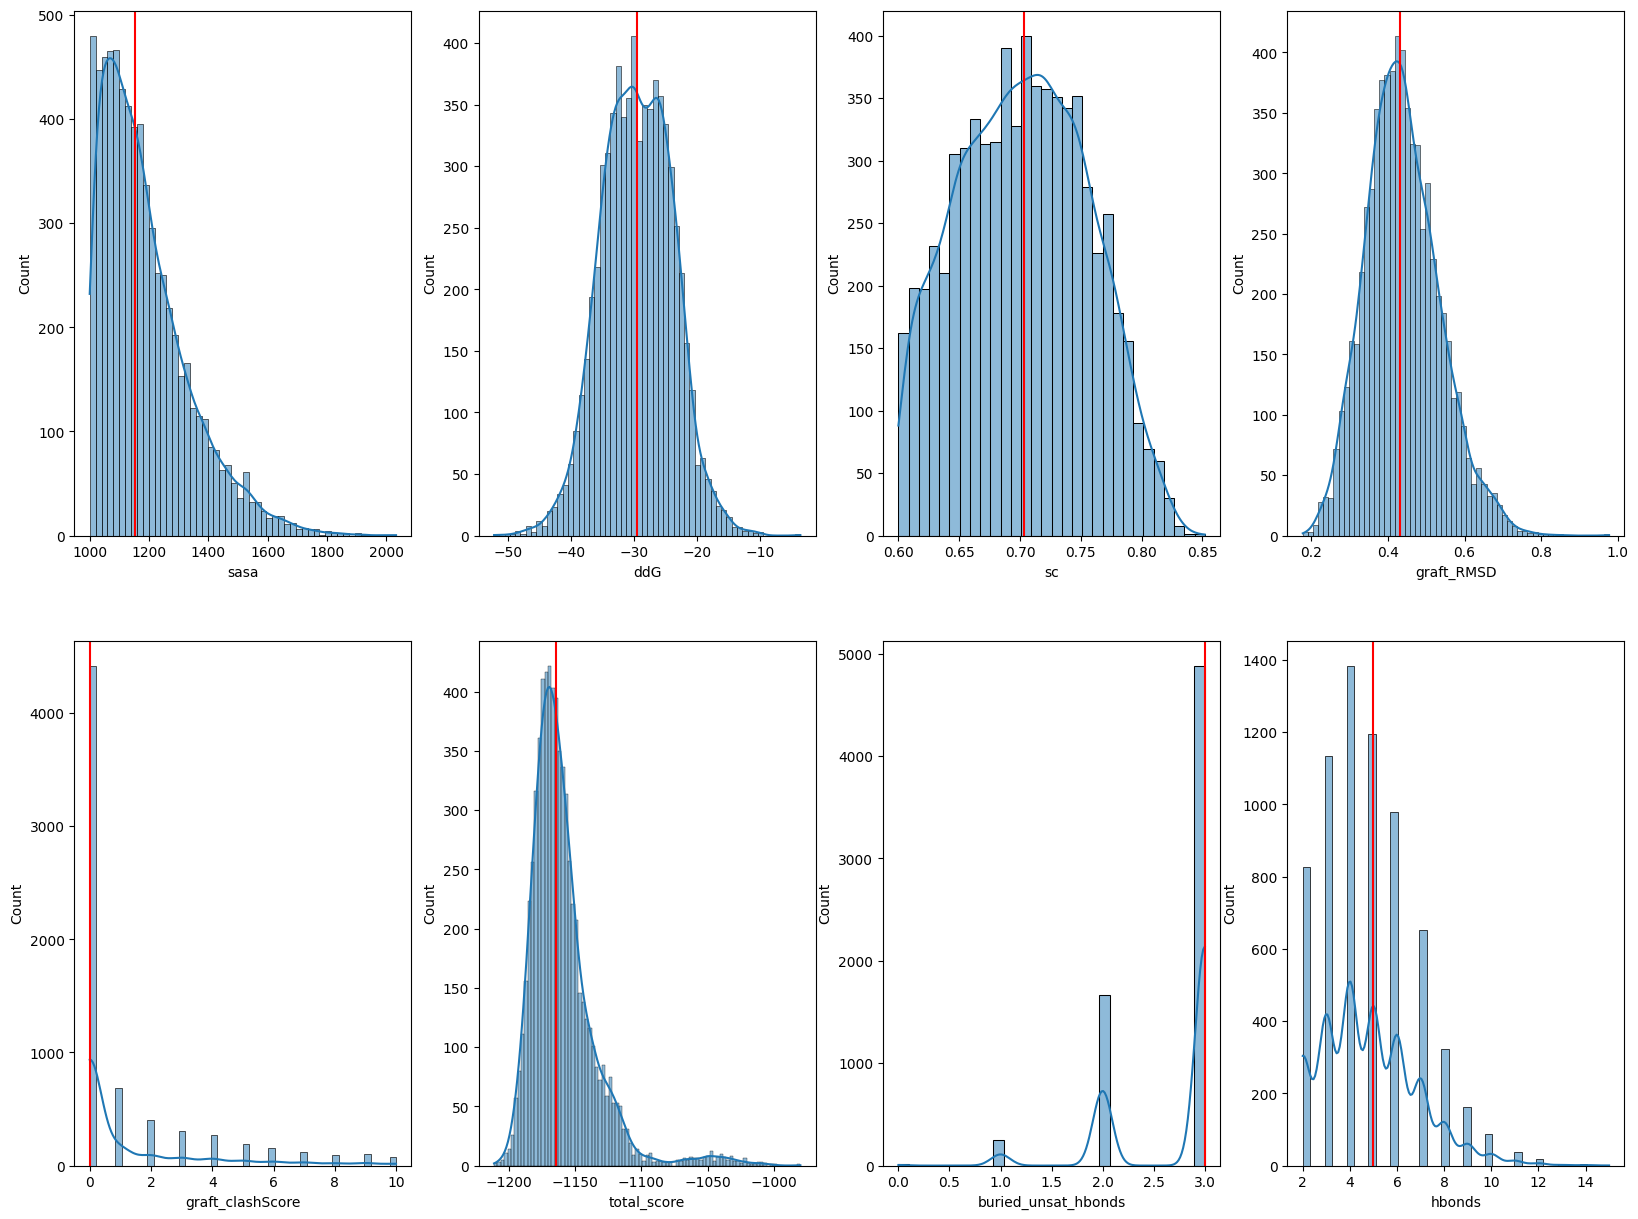

In [30]:
#Plot the distribution of most interesting scores to evaluate designed proteins.

fig, ax = plt.subplots(2, 4, figsize=(20,15))

# SASA (solvent accessible surface area)
sns.histplot(all_mg_scores_df[all_mg_scores_df['total_score']<0]['sasa'], kde=True, ax=ax[0][0])
ax[0][0].axvline(all_mg_scores_df['sasa'].median(), color='red');

# ddG (delta-delta Gibson energy)
sns.histplot(all_mg_scores_df[all_mg_scores_df['total_score']<0]['ddG'], kde=True, ax=ax[0][1])
ax[0][1].axvline(all_mg_scores_df['ddG'].median(), color='red');

# SC (surface complementarity)
sns.histplot(all_mg_scores_df[all_mg_scores_df['total_score']<0]['sc'], kde=True, ax=ax[0][2])
ax[0][2].axvline(all_mg_scores_df['sc'].median(), color='red');

# RMSD (root-mean-squared deviation)
sns.histplot(all_mg_scores_df[all_mg_scores_df['total_score']<0]['graft_RMSD'], kde=True, ax=ax[0][3])
ax[0][3].axvline(all_mg_scores_df['graft_RMSD'].median(), color='red');

# Clashes
sns.histplot(all_mg_scores_df[all_mg_scores_df['total_score']<0]['graft_clashScore'], kde=True, ax=ax[1][0])
ax[1][0].axvline(all_mg_scores_df['graft_clashScore'].median(), color='red');

# Score
sns.histplot(all_mg_scores_df[all_mg_scores_df['total_score']<0]['total_score'], kde=True, ax=ax[1][1])
ax[1][1].axvline(all_mg_scores_df['total_score'].median(), color='red');

# BUNS (buried unsatisfied HBonds)
sns.histplot(all_mg_scores_df[all_mg_scores_df['total_score']<0]['buried_unsat_hbonds'], kde=True, ax=ax[1][2])
ax[1][2].axvline(all_mg_scores_df['buried_unsat_hbonds'].median(), color='red');

# HBonds
sns.histplot(all_mg_scores_df[all_mg_scores_df['total_score']<0]['hbonds'], kde=True, ax=ax[1][3])
ax[1][3].axvline(all_mg_scores_df['hbonds'].median(), color='red');